# IMPORTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import nltk
import re
plt.rcParams["figure.figsize"] = (12, 8) 

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

# FETCH DATA

In [2]:
df_train = pd.read_csv('../data/train.csv/train.csv')
df_test = pd.read_csv('../data/test.csv/test.csv')
df_sample = pd.read_csv('../data/sample_submission.csv/sample_submission.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                    

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97320 entries, 0 to 97319
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            97320 non-null  int64 
 1   comment_text  97320 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [5]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97320 entries, 0 to 97319
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          97320 non-null  int64  
 1   prediction  97320 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.5 MB


In [6]:
target_columns = ['target']
target_columns

['target']

In [7]:
df_train.describe()

,id,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,parent_id,article_id,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
count,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,405130.000000,405130.000000,405130.000000,...,1.026228e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06
mean,3.738434e+06,1.030173e-01,4.582099e-03,1.387721e-02,2.263571e-02,8.115273e-02,9.311271e-03,0.011964,0.003205,0.001884,...,3.722687e+06,2.813597e+05,2.779269e-01,4.420696e-02,1.091173e-01,2.446167e+00,5.843688e-01,6.605974e-03,1.439019e+00,8.784694e+00
std,2.445187e+06,1.970757e-01,2.286128e-02,6.460419e-02,7.873156e-02,1.760657e-01,4.942218e-02,0.087166,0.050193,0.026077,...,2.450261e+06,1.039293e+05,1.055313e+00,2.449359e-01,4.555363e-01,4.727924e+00,1.866589e+00,4.529782e-02,1.787041e+01,4.350086e+01
min,5.984800e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,6.100600e+04,2.006000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,7.969752e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,7.960188e+05,1.601200e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,5.223774e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,5.222993e+06,3.321260e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,5.769854e+06,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.090909e-02,0.000000e+00,0.000000,0.000000,0.000000,...,5.775758e+06,3.662370e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
max,6.334010e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,...,6.333965e+06,3.995410e+05,1.020000e+02,2.100000e+01,3.100000e+01,3.000000e+02,1.870000e+02,1.000000e+00,1.866000e+03,4.936000e+03


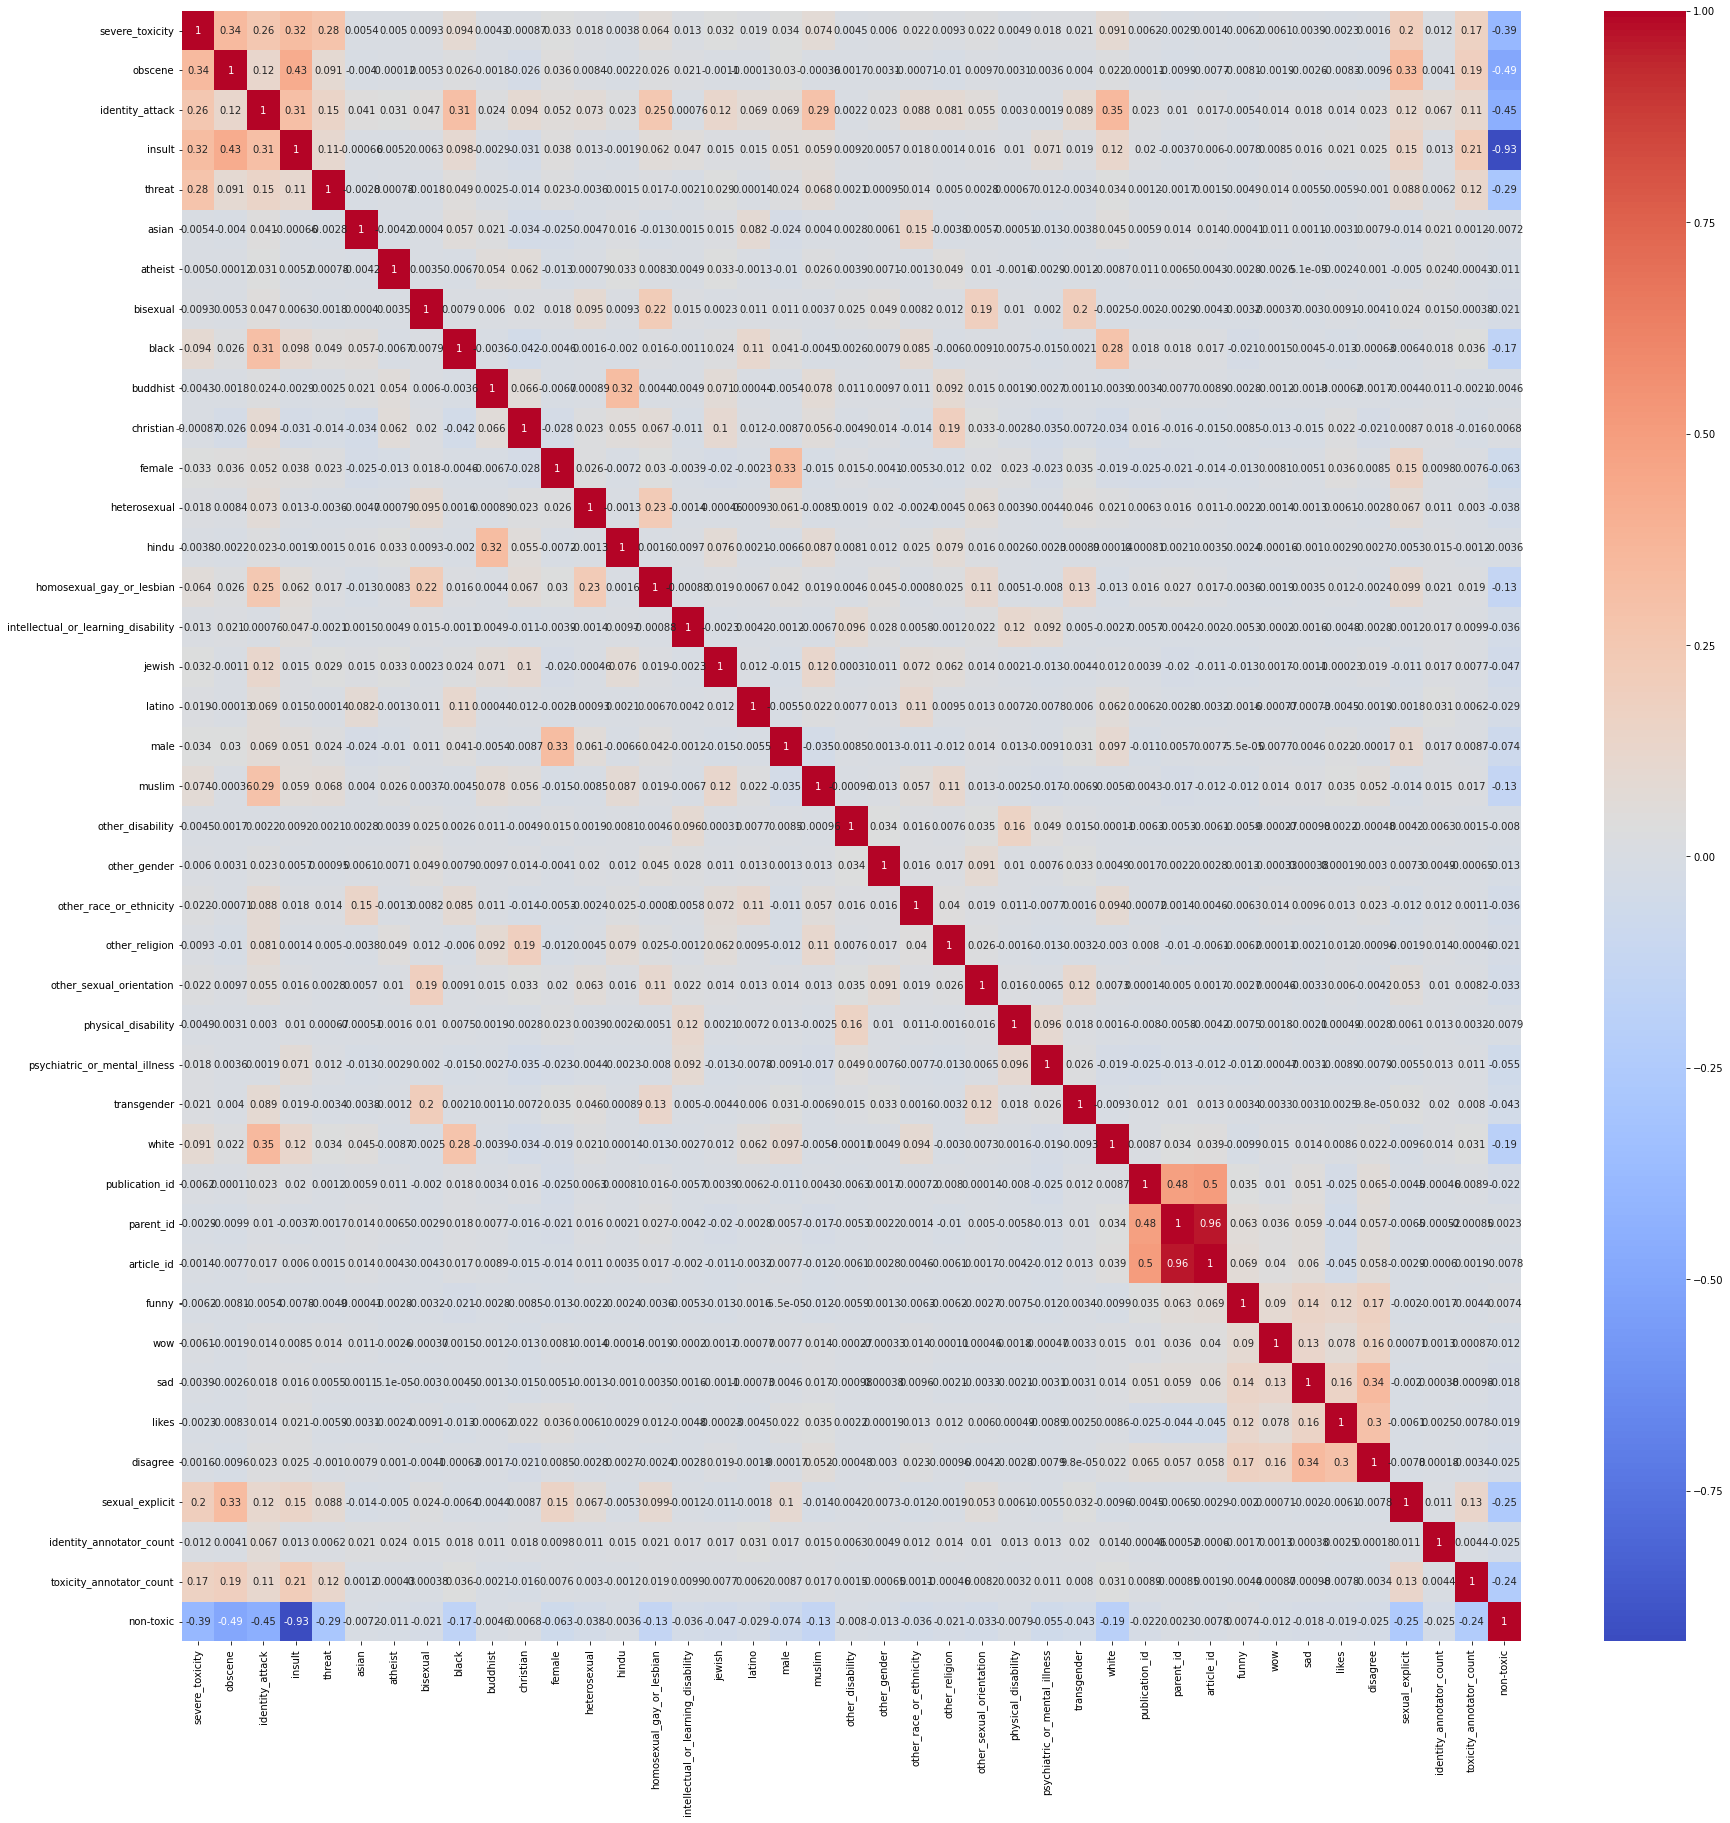

In [12]:
# Visualise any correlations between labels:
# It seems there are some strong correlations between labels
heatmap_data = df_train.drop(columns=['id', 'target'])
plt.rcParams["figure.figsize"] = (30,30)
ax = sns.heatmap(heatmap_data.corr(), cmap='coolwarm', annot=True)
ax.tick_params(labelsize=10)

# CLEANING TEXT DATA

## To Lower

In [13]:
df_train["comment_text"] = [text.lower() for text in df_train["comment_text"]]

In [14]:
df_train.head(10)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,non-toxic
0,59848,0.000000,"this is so cool. it's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
1,59849,0.000000,thank you!! this would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
2,59852,0.000000,this is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
3,59855,0.000000,is this something i'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,rejected,0,0,0,1,0,0.000000,4,47,0.106383
5,59859,0.666667,ur a sh*tty comment.,0.047619,0.638095,0.000000,0.333333,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.009524,0,105,0.333333
6,59861,0.457627,hahahahahahahahhha suck it.,0.050847,0.305085,0.000000,0.254237,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.220339,0,59,0.542373
7,59863,0.000000,ffffuuuuuuuuuuuuuuu,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
8,239575,0.000000,the ranchers seem motivated by mostly by greed...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,approved,0,0,0,0,0,0.000000,0,4,1.000000
9,239576,0.000000,it was a great show. not a combo i'd of expect...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,approved,0,0,0,1,0,0.000000,0,4,1.000000


## Contractions

In [15]:
contraction_mapping = {
    "ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", 
    "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", 
    "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  
    "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": 
    "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", 
    "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", 
    "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
    "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", 
    "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", 
    "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", 
    "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
    "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", 
    "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", 
    "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", 
    "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", 
    "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have",
    "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", 
    "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have",
    "Trump's": "trump is", "Obama's": "obama is", "Canada's": "canada is", "today's": "today is"
}

In [16]:
def clean_contractions(text):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    words = [contraction_mapping[word] if word in contraction_mapping else word for word in text.split(" ")]
    return ' '.join(words)

In [17]:
df_train["comment_text"] = [clean_contractions(text) for text in df_train["comment_text"]]

In [18]:
df_train.head(10)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,non-toxic
0,59848,0.000000,"this is so cool. it is like, 'would you want y...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
1,59849,0.000000,thank you!! this would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
2,59852,0.000000,this is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
3,59855,0.000000,is this something i will be able to install on...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,rejected,0,0,0,1,0,0.000000,4,47,0.106383
5,59859,0.666667,ur a sh*tty comment.,0.047619,0.638095,0.000000,0.333333,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.009524,0,105,0.333333
6,59861,0.457627,hahahahahahahahhha suck it.,0.050847,0.305085,0.000000,0.254237,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.220339,0,59,0.542373
7,59863,0.000000,ffffuuuuuuuuuuuuuuu,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
8,239575,0.000000,the ranchers seem motivated by mostly by greed...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,approved,0,0,0,0,0,0.000000,0,4,1.000000
9,239576,0.000000,it was a great show. not a combo i would of ex...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,approved,0,0,0,1,0,0.000000,0,4,1.000000


## Special Characters

In [19]:
punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'

In [20]:
specail_signs = { "…": "...", "₂": "2"}

In [21]:
def clean_special_chars(text):
    for s in specail_signs: 
        text = text.replace(s, specail_signs[s])
    for p in punct:
        text = text.replace(p, f' {p} ')
    return text

In [22]:
df_train["comment_text"] = [clean_special_chars(text) for text in df_train["comment_text"]]

In [23]:
df_train.head(10)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,non-toxic
0,59848,0.000000,"this is so cool . it is like , ' would yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
1,59849,0.000000,thank you ! ! this would make my life a lot ...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
2,59852,0.000000,this is such an urgent design problem ; kudos...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
3,59855,0.000000,is this something i will be able to install on...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
4,59856,0.893617,haha you guys are a bunch of losers .,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,rejected,0,0,0,1,0,0.000000,4,47,0.106383
5,59859,0.666667,ur a sh * tty comment .,0.047619,0.638095,0.000000,0.333333,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.009524,0,105,0.333333
6,59861,0.457627,hahahahahahahahhha suck it .,0.050847,0.305085,0.000000,0.254237,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.220339,0,59,0.542373
7,59863,0.000000,ffffuuuuuuuuuuuuuuu,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
8,239575,0.000000,the ranchers seem motivated by mostly by greed...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,approved,0,0,0,0,0,0.000000,0,4,1.000000
9,239576,0.000000,it was a great show . not a combo i would of ...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,approved,0,0,0,1,0,0.000000,0,4,1.000000


## Special Caps

In [24]:
special_caps_mapping = { 
    "ᴀ": "a", "ʙ": "b", "ᴄ": "c", "ᴅ": "d", "ᴇ": "e", "ғ": "f", "ɢ": "g", "ʜ": "h", "ɪ": "i", "ᴊ": "j", "ᴋ": "k", "ʟ": "l", "ᴍ": "m",
    "ɴ": "n", "ᴏ": "o", "ᴘ": "p", "ǫ": "q", "ʀ": "r", "s": "s", "ᴛ": "t", "ᴜ": "u", "ᴠ": "v", "ᴡ": "w", "x": "x", "ʏ": "y", "ᴢ": "z",
    "𝘊": "C", "𝘦": "e", "𝘳": "r", "𝘢": "a", "𝘵": "t", "𝘰": "o", "𝘤": "c", "𝘺": "y", "𝘴": "s", "𝘪": "i", "𝘧": "f", "𝘮": "m", "𝘣": "b",
    "м": "m", "υ": "u", "т": "t", "ѕ": "s", "𝙀": "E", "𝒛": "z", "𝑲": "K", "𝑳": "L", "𝑾": "W", "𝒋": "j", "𝟒": "4",
    "𝙒": "W", "𝘾": "C", "𝘽": "B", "𝑱": "J", "𝑹": "R", "𝑫": "D", "𝑵": "N", "𝑪": "C", "𝑯": "H", "𝒒": "q", "𝑮": "G", "𝗕": "B", "𝗴": "g", 
    "𝟐": "2", "𝗸": "k", "𝗟": "L", "𝗠": "M", "𝗷": "j", "𝐎": "O", "𝐍": "N", "𝐊": "K", "𝑭": "F", "Е": "E"
}

In [25]:
def clean_small_caps(text):
    for char in special_caps_mapping:
        text = text.replace(char, special_caps_mapping[char])
    return text

In [26]:
df_train["comment_text"] = [clean_small_caps(text) for text in df_train["comment_text"]]

In [27]:
df_train.head(10)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,non-toxic
0,59848,0.000000,"this is so cool . it is like , ' would yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
1,59849,0.000000,thank you ! ! this would make my life a lot ...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
2,59852,0.000000,this is such an urgent design problem ; kudos...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
3,59855,0.000000,is this something i will be able to install on...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
4,59856,0.893617,haha you guys are a bunch of losers .,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,rejected,0,0,0,1,0,0.000000,4,47,0.106383
5,59859,0.666667,ur a sh * tty comment .,0.047619,0.638095,0.000000,0.333333,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.009524,0,105,0.333333
6,59861,0.457627,hahahahahahahahhha suck it .,0.050847,0.305085,0.000000,0.254237,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.220339,0,59,0.542373
7,59863,0.000000,ffffuuuuuuuuuuuuuuu,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
8,239575,0.000000,the ranchers seem motivated by mostly by greed...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,approved,0,0,0,0,0,0.000000,0,4,1.000000
9,239576,0.000000,it was a great show . not a combo i would of ...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,approved,0,0,0,1,0,0.000000,0,4,1.000000


## Emojis

In [28]:
emojis = "🍕🐵😑😢🐶️😜😎👊😁😍💖💵👎😀😂🔥😄🏻💥😋👏😱🚌ᴵ͞🌟😊😳😧🙀😐😕👍😮😃😘💩💯⛽🚄😖🏼🚲😟😈💪🙏🎯🌹😇💔😡👌🙄😠😉😤⛺🙂😏🍾🎉😞🏾😅😭👻😥😔😓🏽🎆🍻🍽🎶🌺🤔😪🐰🐇🐱🙆😨🙃💕💗💚🙈😴🏿🤗🇺🇸⤵🏆🎃😩👮💙🐾🐕😆🌠🐟💫💰💎🖐🙅⛲🍰🤐👆🙌💛🙁👀🙊🙉🚬🤓😵😒͝🆕👅👥👄🔄🔤👉👤👶👲🔛🎓😣⏺😌🤑🌏😯😲💞🚓🔔📚🏀👐💤🍇🏡❔⁉👠》🇹🇼🌸🌞🎲😛💋💀🎄💜🤢َِ🗑💃📣👿༼つ༽😰🤣🐝🎅🍺🎵🌎͟🤡🤥😬🤧🚀🤴😝💨🏈😺🌍⏏ệ🍔🐮🍁🍆🍑🌮🌯🤦🍀😫🤤🎼🕺🍸🥂🗽🎇🎊🆘🤠👩🖒🚪🇫🇷🇩🇪😷🇨🇦🌐📺🐋💘💓💐🌋🌄🌅👺🐷🚶🤘ͦ💸👂👃🎫🚢🚂🏃👽😙🎾👹⎌🏒⛸🏄🐀🚑🤷🤙🐒🐈ﷻ🦄🚗🐳👇⛷👋🦊🐽🎻🎹⛓🏹🍷🦆♾🎸🤕🤒⛑🎁🏝🦁🙋😶🔫👁💲🗯👑🚿💡😦🏐🇰🇵👾🐄🎈🔨🐎🤞🐸💟🎰🌝🛳🍭👣🏉💭🎥🐴👨🤳🦍🍩😗🏂👳🍗🕉🐲🍒🐑⏰💊🌤🍊🔹🤚🍎𝑷🐂💅💢💒🚴🖕🖤🥘📍👈➕🚫🎨🌑🐻🤖🎎😼🕷👼📉🍟🍦🌈🔭《🐊🐍🐦🐡💳ἱ🙇🥜🔼"

In [29]:
def remove_emojis(text):
    for emoji in emojis:
        text = text.replace(emoji, '')
    return text

In [31]:
df_train["comment_text"] = [remove_emojis(text) for text in df_train["comment_text"]]

In [32]:
df_train.head(10)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,non-toxic
0,59848,0.000000,"this is so cool . it is like , ' would yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
1,59849,0.000000,thank you ! ! this would make my life a lot ...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
2,59852,0.000000,this is such an urgent design problem ; kudos...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
3,59855,0.000000,is this something i will be able to install on...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
4,59856,0.893617,haha you guys are a bunch of losers .,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,rejected,0,0,0,1,0,0.000000,4,47,0.106383
5,59859,0.666667,ur a sh * tty comment .,0.047619,0.638095,0.000000,0.333333,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.009524,0,105,0.333333
6,59861,0.457627,hahahahahahahahhha suck it .,0.050847,0.305085,0.000000,0.254237,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.220339,0,59,0.542373
7,59863,0.000000,ffffuuuuuuuuuuuuuuu,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
8,239575,0.000000,the ranchers seem motivated by mostly by greed...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,approved,0,0,0,0,0,0.000000,0,4,1.000000
9,239576,0.000000,it was a great show . not a combo i would of ...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,approved,0,0,0,1,0,0.000000,0,4,1.000000


## Stemmer

In [33]:
stemmer = nltk.stem.PorterStemmer()

In [34]:
def cleaning(text):
    row = str(text)
    row = row.replace('\n', ' ')
    row = row.replace('\t', ' ')
    row = row.replace('\\', "")
    row = re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', row)
    row = re.sub(' +', ' ', row)
    row = row.replace("।", "")
    row = re.sub('[1234567890]', '', row) 
    row = row.replace('’', '')
    row = row.replace('‘', '')
    
    row = row.split()
    row = [w for w in row]
    row = [stemmer.stem(w) for w in row]
    row = " ".join(row)
    return row

In [36]:
# df_train["comment_text"] = [cleaning(text) for text in df_train["comment_text"]]

In [37]:
df_train.head(10)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,non-toxic
0,59848,0.000000,"this is so cool . it is like , ' would yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
1,59849,0.000000,thank you ! ! this would make my life a lot ...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
2,59852,0.000000,this is such an urgent design problem ; kudos...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
3,59855,0.000000,is this something i will be able to install on...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
4,59856,0.893617,haha you guys are a bunch of losers .,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,rejected,0,0,0,1,0,0.000000,4,47,0.106383
5,59859,0.666667,ur a sh * tty comment .,0.047619,0.638095,0.000000,0.333333,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.009524,0,105,0.333333
6,59861,0.457627,hahahahahahahahhha suck it .,0.050847,0.305085,0.000000,0.254237,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.220339,0,59,0.542373
7,59863,0.000000,ffffuuuuuuuuuuuuuuu,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.000000,0,4,1.000000
8,239575,0.000000,the ranchers seem motivated by mostly by greed...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,approved,0,0,0,0,0,0.000000,0,4,1.000000
9,239576,0.000000,it was a great show . not a combo i would of ...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,approved,0,0,0,1,0,0.000000,0,4,1.000000


# TRAIN TEST SPLIT

In [39]:
x = df_train['comment_text']
y = df_train['target']
del df_train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13)

# VECTORIZER

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

# TRAIN & TEST

In [ ]:
y_train = y_train.tolist()

In [ ]:
for i in range(len(y_train)):
  if (y_train[i]>=0.5):
    y_train[i] = 1
  else:
    y_train[i] = 0

In [ ]:
y_test = y_test.tolist()

In [ ]:
for i in range(len(y_test)):
  if (y_test[i]>=0.5):
    y_test[i] = 1
  else:
    y_test[i] = 0

In [ ]:
train_features = count_vec.fit_transform(X_train.values.astype(str))
test_features = count_vec.transform(X_test.values.astype(str))

del X_train
del X_test



from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=0, solver='lbfgs')

Log_Reg.fit(train_features , y_train)
accuracy = Log_Reg.score(test_features, y_test)

print(accuracy)

0.9562274792417359


c:\ProgramData\Miniconda3\envs\cat-in-the-dat-env\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
y_pred = Log_Reg.predict(test_features)

In [ ]:
import pickle
pickle.dump(Log_Reg, open('../models/model_no_toxic.pk', 'wb'))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.68      0.76      3162
           1       0.97      0.99      0.98     28753

    accuracy                           0.96     31915
   macro avg       0.91      0.84      0.87     31915
weighted avg       0.95      0.96      0.95     31915



<AxesSubplot:>

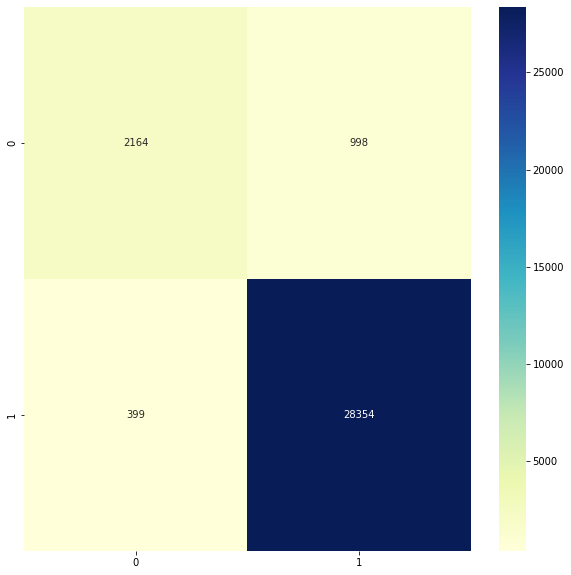

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
sns.heatmap(cm, cmap= "YlGnBu", annot=True, fmt='')

# SUBMISSION GENERATION

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Upskill/project2/data/test.csv')

In [ ]:
df_test.head(10)

,id,comment_text
0,7097320,[ Integrity means that you pay your debts.]\n\...
1,7097321,This is malfeasance by the Administrator and t...
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...
3,7097323,"Paul: Thank you for your kind words. I do, in..."
4,7097324,Sorry you missed high school. Eisenhower sent ...
5,7097325,Let’s see if I understand this; Berkowitz anno...
6,7097326,Our oils read; President IS taking different ...
7,7097327,'Work together'? Dream on. The liberals are al...
8,7097328,What would Jerry Prevo think about that story?...
9,7097329,When wil the indigenous be accountable and t...


In [ ]:
#Cleaning
df_test["comment_text"] = [text.lower() for text in df_test["comment_text"]]
df_test["comment_text"] = [clean_contractions(text) for text in df_test["comment_text"]]
df_test["comment_text"] = [clean_special_chars(text) for text in df_test["comment_text"]]
df_test["comment_text"] = [clean_small_caps(text) for text in df_test["comment_text"]]
df_test["comment_text"] = [remove_emojis(text) for text in df_test["comment_text"]]
df_test["comment_text"] = [cleaning(text) for text in df_test["comment_text"]]

In [ ]:
df_test.head(10)

,id,comment_text
0,7097320,integr mean that you pay your debt doe thi app...
1,7097321,thi is malfeas by the administr and the board ...
2,7097322,rmiller spoken like a true elitist but look ou...
3,7097323,paul thank you for your kind word i do inde ha...
4,7097324,sorri you miss high school eisenhow sent troop...
5,7097325,let us see if i understand thi berkowitz annou...
6,7097326,our oil read presid is take differ tactic to d...
7,7097327,work togeth dream on the liber are alreadi bus...
8,7097328,what would jerri prevo think about that stori ...
9,7097329,when wil the indigen be account and take respo...


In [ ]:
test_features = count_vec.transform(df_test["comment_text"].values.astype(str))

In [ ]:
y = Log_Reg.predict(test_features)

In [ ]:
df_test['prediction'] = y

In [ ]:
# for index, rows in df_test[df_test['prediction'] == 1].head(100).iterrows():
#   print(index, rows['comment_text'])

In [ ]:
# for index, rows in df_test[df_test['prediction'] == 0].head(100).iterrows():
#   print(index, rows['comment_text'])

In [ ]:
df_test.drop(columns='comment_text').to_csv('../data/submission.csv', index=False)